In [1]:
import sys
sys.path.insert(0,'backend')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gym
import stable_baselines
from stable_baselines import A2C, ACER, ACKTR, DQN, DDPG, SAC, PPO1, PPO2, TD3, TRPO
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.gail import ExpertDataset, generate_expert_traj

import webotsgym as wg

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
from webotsgym.utils import exponential_decay
from webotsgym.env.reward import step_pen_exp

class MyEval(wg.WbtReward):
    def __init__(self, env, config):
        super(MyEval, self).__init__(env, config)

    def calc_reward(self):
        target_distance = self.env.get_target_distance(False)
        if target_distance < 0.08:
            return 5000 + 5000 * (1 - abs(self.env.state.speed))
        else:
            reward = 0
            reward += -2
        
            if self.env.state._action_denied:
                reward += -3
        
            if self.env.state.touching:
                reward += -100
        return reward

    def check_done(self):
        if self.env.total_reward < -5000:
            print("reward boundary")
            return True
        if self.env.get_target_distance(False) < 0.08:
            print("target reached")
            return True
        return False

In [3]:
config = wg.WbtConfig()
config.world_size = 3
config.num_obstacles = 0
config.sim_mode = wg.config.SimSpeedMode.RUN
config.sim_step_every_x = 5
config.relative_action = True
config.direction_type = wg.config.DirectionType.STEERING

SimSpeedMode.RUN


In [4]:
def predict(env, seed, model, steps=100, render=False):    
    obs = env.reset(seed)
    for i in range(steps):
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)

        if env.get_target_distance() < 0.08:
            return i
        
    return steps+20

In [5]:
# model loading
model1 = PPO1.load("trainingruns/wbt_3x3_reach_target/{}".format("3x3"))
# model2 = PPO1.load("models/keep/comparison_timesteps/{}".format("PPO_160k_4sensors_N=10_seed=1_obs=3x1"))
models = [model1]
names = ["3x3"]


env = wg.WbtGym(train=True, 
                evaluate_class=MyEval,
                config=config)
env.com.send_data_request()
env.get_data()
obs = env.observation
res_all = np.empty((0, len(models)))

num_of_steps = 500
num_of_envs = 5

for env_seed in range(num_of_envs):
    res_env = np.empty(len(models))
    for model in models:
        res_env[models.index(model)] = predict(env, env_seed, model, num_of_steps)
    res_all = np.vstack((res_all, res_env))
    
df = pd.DataFrame(res_all)
df.columns = names





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


backend/webotsgym/env/webotenv.py:116: UserWarning: Relative property of action class is overwritten by config.relative_action.
  warnings.warn("Relative property of action class is overwritten by config.relative_action.")


Accepting on Port:  10201
ERROR: recv msg count, is  1  should  2
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward

reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward b

reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward boundary
reward b

In [6]:
df_analysis = df.copy()
df_analysis["all"] = df_analysis.sum(axis=1)
df_analysis["seed"] = range(num_of_envs)
df_analysis.sort_values("all", ascending=False)

,3x3,all,seed
0,520.0,520.0,0
1,520.0,520.0,1
2,520.0,520.0,2
3,520.0,520.0,3
4,520.0,520.0,4


In [7]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

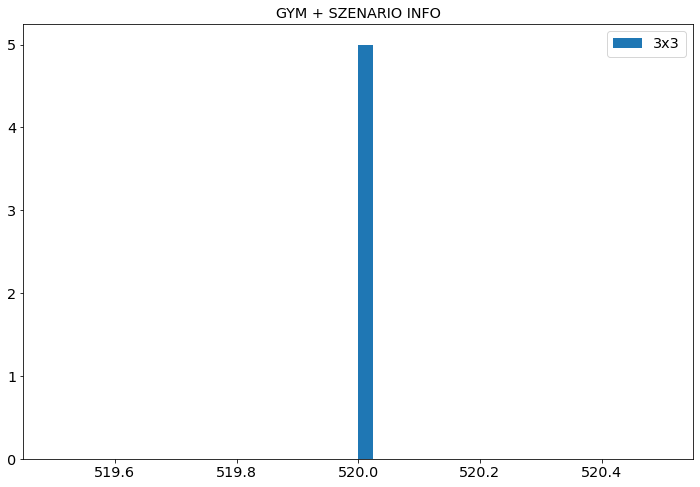

In [8]:
plt.figure(figsize=(12,8))
plt.hist(df.values, 40, histtype='bar', label=names)
plt.title('GYM + SZENARIO INFO')
plt.legend()
plt.show()